In [1]:
%autosave 300

Autosaving every 300 seconds


# Introduction 

http://fancyerii.github.io/2021/05/11/huggingface-transformers-1/#%E4%BD%BF%E7%94%A8tokenizer

## pretrain & finetuning



<center>Pretraining</center>



- Pretraining is the act of training a model from scratch: the weights are randomly initialized, and the training starts without any prior knowledge.

- This pretraining is usually done on very large amounts of data. Therefore, it requires a __very large corpus of data__, and training can take up to several weeks.



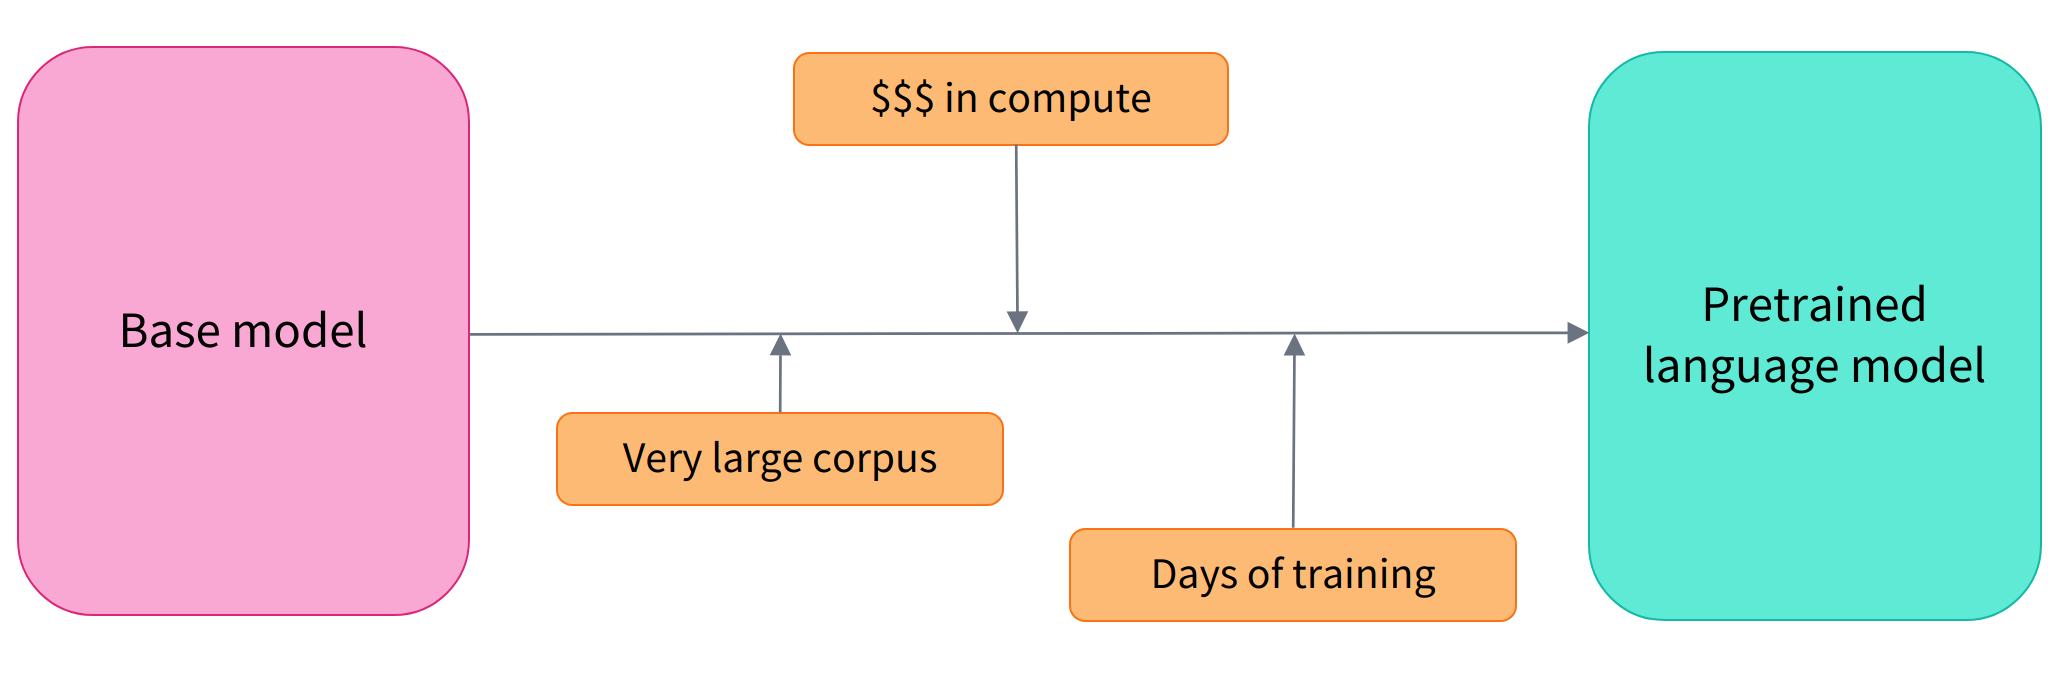



<center>Finetuned</center>


Fine-tuning, on the other hand, is the training done after a model has been pretrained. To perform fine-tuning, you first acquire a pretrained language model, then perform additional training with a dataset specific to your task. Wait — why not simply train directly for the final task? There are a couple of reasons:


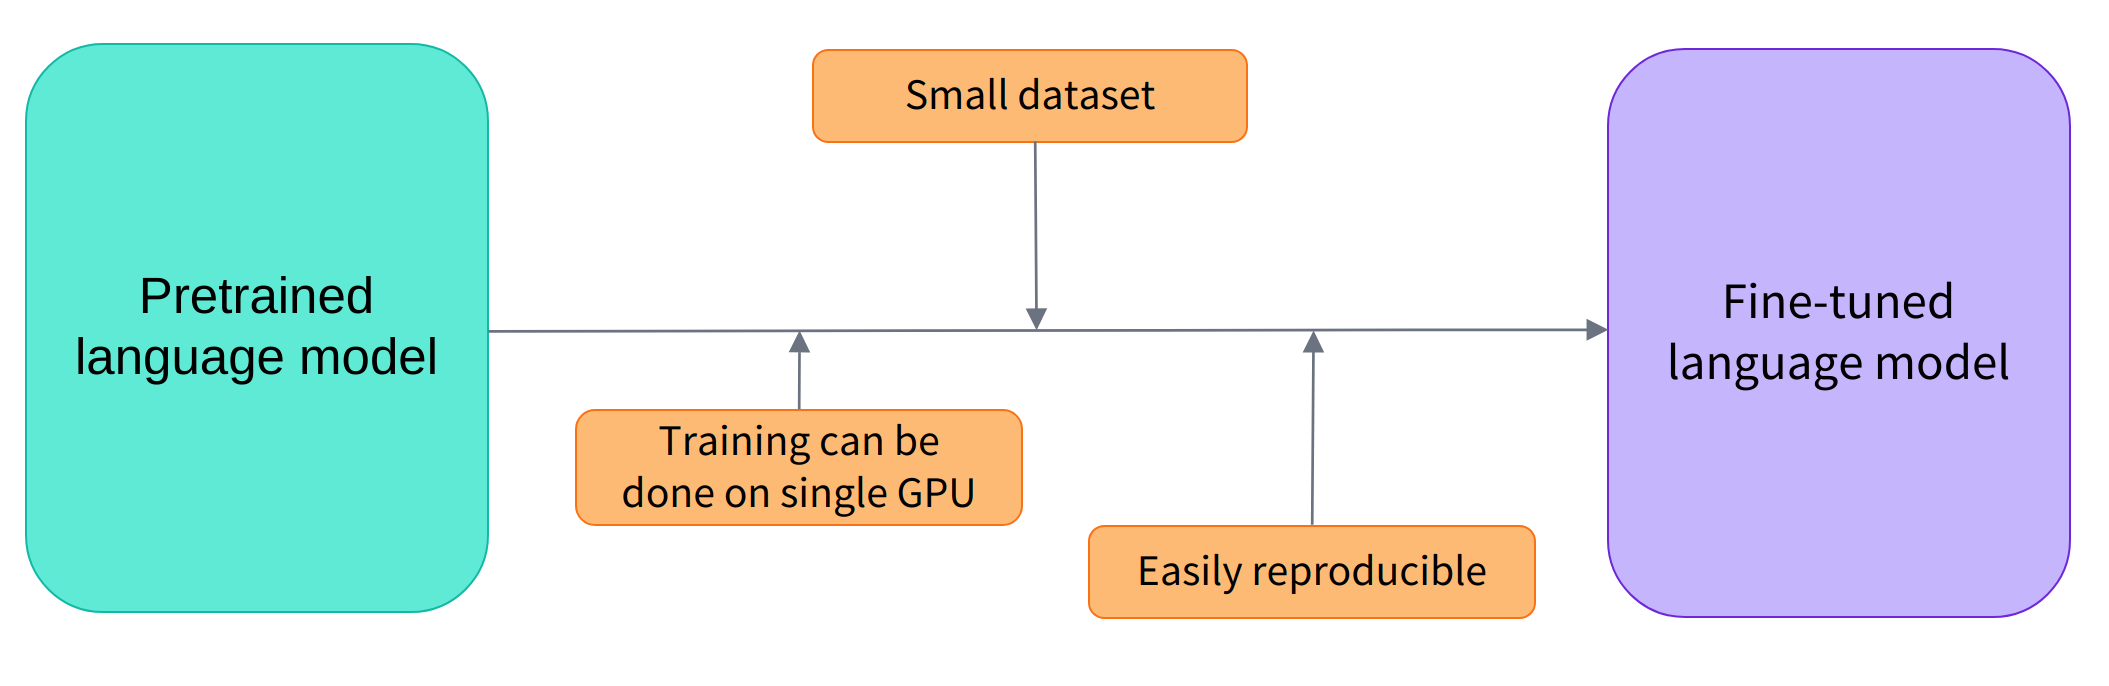



## encoder and decode

__Encoder-only models:__

- Good for tasks that require understanding of the input, such as sentence classification and named entity recognition.

__Decoder-only models:__
- Good for generative tasks such as text generation.

__Encoder-decoder models:__
- or sequence-to-sequence models: Good for generative tasks that require an input, such as translation or summarization.

# TFHub- bert

- [intro](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/46_BERT_intro/bert_intro.ipynb)
- [official tf hub bert](https://tfhub.dev/google/collections/bert/1)

__<center>bert</center>__
(Bidirectional Encoder Representations from Transformers) provides dense vector representations for natural language by using a deep, pre-trained neural network with the Transformer architecture

__two components from tf hub bert:__
- bert model
- bert proprocessor(tokenzier)


- ensorflow/bert_en_cased_L-12_H-768_A-12
- It uses L=12 hidden layers. a hidden size of H=768, and A=12 attention heads. This model has been pre-trained for English on the Wikipedia and BooksCorpus.

<center>cased vs uncased bert</center>
    
    
- BERT uncased, the text has been lowercased before WordPiece tokenization step in 
- BERT cased, the text is same as the input text (no changes). 

## bert encoder

In [1]:
'''bert proprocessor
This SavedModel implements the preprocessor API for text embeddings with Transformer encoders, which offers several ways to go from one or more batches of text segments 
(plain text encoded as UTF-8) to the inputs for the Transformer encoder model.
'''

import tensorflow_text as text  # Registers the ops.
import os 
import tensorflow as tf
import tensorflow_hub as hub
os.chdir('/data/jyu29')

In [2]:
process_url = 'pretrained_model/bert_en_uncased_preprocess_3'
bert_encoder = hub.KerasLayer(process_url)

In [4]:
text = ['nice movie indeed','I love python programming']
text_preprocessed = bert_processor(text)

The result of preprocessing is a batch of fixed-length input sequences for the Transformer encoder.

An input sequence starts with one start-of-sequence token, followed by the tokenized segments, each terminated by one end-of-segment token. Remaining positions up to seq_length, if any, are filled up with padding tokens. If an input sequence would exceed seq_length, the tokenized segments in it are truncated to prefixes of approximately equal sizes to fit exactly.

The encoder_inputs are a dict of three int32 Tensors, all with shape [batch_size, seq_length], whose elements represent the batch of input sequences as follows:

- "input_word_ids": has the token ids of the input sequences.
- "input_mask": has value 1 at the position of all input tokens present before padding and value 0 for the padding tokens.
- "input_type_ids": has the index of the input segment that gave rise to the input token at the respective position. The first input segment (index 0) includes the start-of-sequence token and its end-of-segment token. The second segment (index 1, if present) includes its end-of-segment token. Padding tokens get index 0 again.

In [23]:
#input_mask
for segment in text_preprocessed['input_mask']:
    print(segment)

tf.Tensor(
[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(128,), dtype=int32)
tf.Tensor(
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(128,), dtype=int32)


In [5]:
# input_word_ids
# 101 --> CLS token
# 102 --> SEP token
# 'nice movie indeed' ----- CLS nice movie indeed SEP
for segment in text_preprocessed['input_word_ids']:
    print(segment)

tf.Tensor(
[ 101 3835 3185 5262  102    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0], shape=(128,), dtype=int32)
tf.Tensor(
[  101  1045  2293 18750  4730   102     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0 

In [25]:
for segment in text_preprocessed['input_type_ids']:
    print(segment)

tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(128,), dtype=int32)
tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(128,), dtype=int32)


In [ ]:
# preprocessor = hub.load(
#     "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

# # Step 1: tokenize batches of text inputs.
# text_inputs = [tf.keras.layers.Input(shape=(), dtype=tf.string),
#                ...] # This SavedModel accepts up to 2 text inputs.
# tokenize = hub.KerasLayer(preprocessor.tokenize)
# tokenized_inputs = [tokenize(segment) for segment in text_inputs]

# # Step 2 (optional): modify tokenized inputs.
# pass

# # Step 3: pack input sequences for the Transformer encoder.
# seq_length = 128  # Your choice here.
# bert_pack_inputs = hub.KerasLayer(
#     preprocessor.bert_pack_inputs,
#     arguments=dict(seq_length=seq_length))  # Optional argument.
# encoder_inputs = bert_pack_inputs(tokenized_inputs)

## bert layer

- The encoder's outputs are the pooled_output to represents each input sequence as a whole

- the sequence_output to represent each input token in context. Either of those can be used as input to further model building.



In [3]:
model_url = 'pretrained_model/bert_en_uncased_L-12_H-768_A-12_4'
bert_layer= hub.KerasLayer(model_url)

In [9]:
text = ['nice movie indeed','I love python programming']


In [11]:
# using preprocess encoder text first
output_text = bert_layer(bert_processor(text))


In [12]:
output_text.keys()

dict_keys(['encoder_outputs', 'default', 'sequence_output', 'pooled_output'])

In [19]:
# output_text['sequence_output']


In [20]:
# output_text['encoder_outputs']


In [21]:
# output_text['pooled_output']


In [4]:
''' do not specify the text at first'''
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
# preprocessor = hub.KerasLayer(
#     "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder_inputs = bert_encoder(text_input)
outputs = bert_layer(encoder_inputs)
pooled_output = outputs["pooled_output"]      # [batch_size, 768].
sequence_output = outputs["sequence_output"]  # [batch_size, seq_length, 768].

In [5]:
pooled_output

<KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer_1')>

In [6]:
sequence_output

<KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>

In [7]:
embedding_model = tf.keras.Model(text_input, pooled_output)

In [8]:
embedding_model

In [12]:
print(embedding_model(tf.constant(text)))

tf.Tensor(
[[-0.791774   -0.21411917  0.4976954  ...  0.24465214 -0.47334468
   0.8175868 ]
 [-0.9171231  -0.47935167 -0.7865698  ... -0.6175175  -0.7102687
   0.9218429 ]], shape=(2, 768), dtype=float32)


In [13]:
## simple model
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_encoder(text_input)
outputs = bert_layer(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                

# Huggingface - transformer

__<center>Introduction</center>__
Transformers (formerly known as pytorch-transformers and pytorch-pretrained-bert) provides thousands of pretrained models to perform tasks on different modalities such as text, vision, and audio.

__These models can applied on:__

- 📝 Text, for tasks like text classification, information extraction, question answering, summarization, translation, text generation, in over 100 languages.
- 🖼️ Images, for tasks like image classification, object detection, and segmentation.
- 🗣️ Audio, for tasks like speech recognition and audio classification.

Transformers provides APIs to quickly download and use those pretrained models on a given text, fine-tune them on your own datasets and then share them with the community on our model hub. At the same time, each python module defining an architecture is fully standalone and can be modified to enable quick research experiments.

Transformers is backed by the three most popular deep learning libraries — Jax, PyTorch and TensorFlow

With millions to tens of billions of parameters, training and deploying these models is a complicated undertaking. Furthermore, with new models being released on a near-daily basis and each having its own implementation, trying them all out is no easy task.

The 🤗 Transformers library was created to solve this problem. Its goal is to provide a single API through which any Transformer model can be loaded, trained, and saved. The library’s main features are:

[supported model on huggingface](https://huggingface.co/docs/transformers/index)

## pipeline

The most basic object in the 🤗 Transformers library is the pipeline() function. It connects a model with its necessary preprocessing and postprocessing steps, allowing us to directly input any text and get an intelligible answer:

不进行finetune，直接完成任务

Some of the currently available pipelines are:

- feature-extraction (get the vector representation of a text)
- fill-mask
- ner (named entity recognition)
- question-answering
- sentiment-analysis
- summarization
- text-generation
- translation
- zero-shot-classification

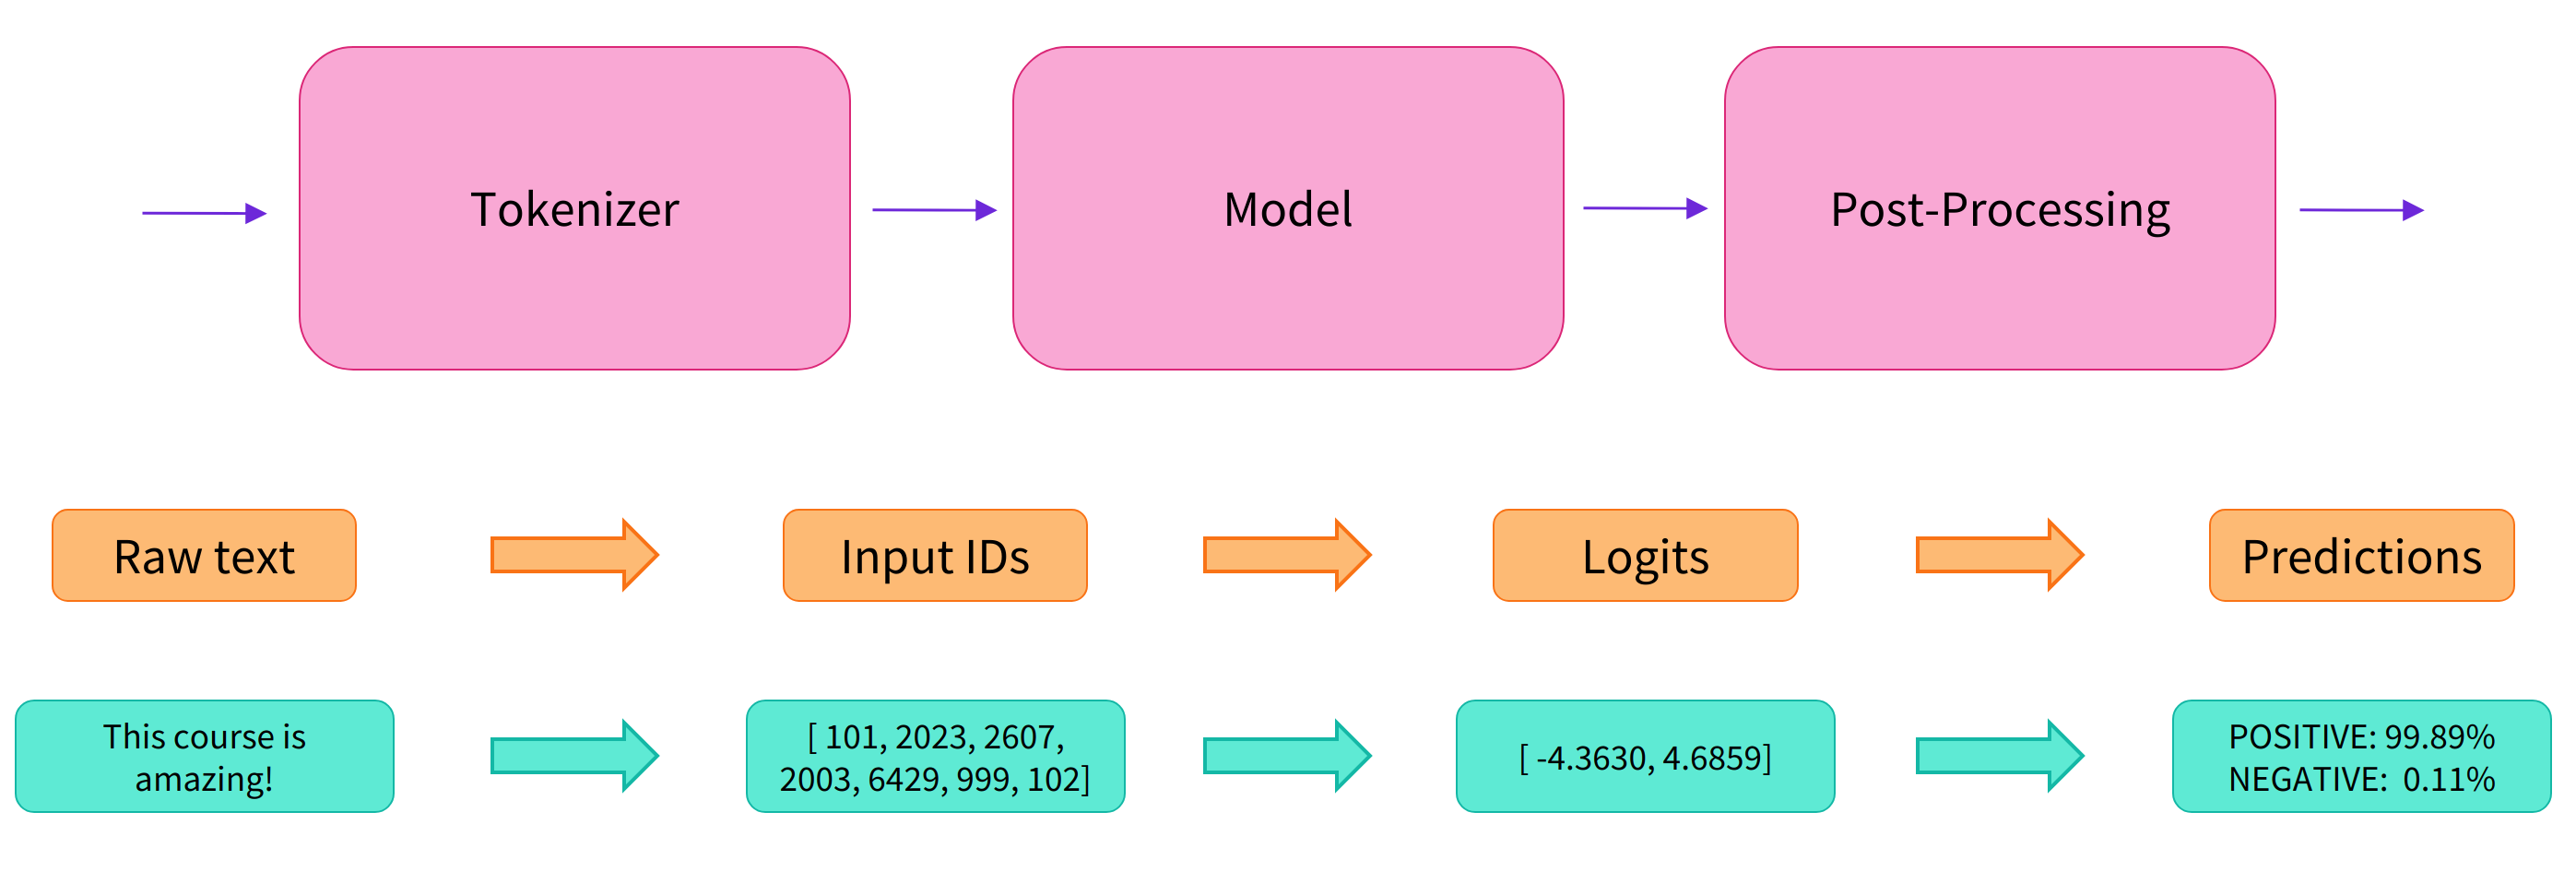

In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/230 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9598047137260437}]

In [2]:
## pass mutiple sentence

classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598047137260437},
 {'label': 'NEGATIVE', 'score': 0.9994558095932007}]

In [5]:
text = ['nice movie indeed','I love python programming']
classifier(text)

[{'label': 'POSITIVE', 'score': 0.9998646378517151},
 {'label': 'POSITIVE', 'score': 0.9994510412216187}]

In [7]:
# zero shot classfication
classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

Downloading:   0%|          | 0.00/908 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445969223976135, 0.11197564005851746, 0.0434274859726429]}

In [9]:
classifier(
    "This ride attitide the hotel is bad.but the sush roll taste good",
    candidate_labels=["food", "service", "technology"],
)

{'sequence': 'This ride attitide the hotel is bad.but the sush roll taste good',
 'labels': ['service', 'food', 'technology'],
 'scores': [0.5781354308128357, 0.3602152168750763, 0.06164930760860443]}

In [12]:
classifier(
    "reasonably tag",
    candidate_labels=["food", "service", "price"],
)

{'sequence': 'reasonably tag',
 'labels': ['price', 'service', 'food'],
 'scores': [0.84091717004776, 0.1455126404762268, 0.013570115901529789]}

In [29]:
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [30]:
results = classifier(["We are very happy to show you the Transformers library.",
...            "We hope you don't hate it."])
for result in results:
    print(f"label: {result['label']}, with score: {round(result['score'], 4)}")

label: 5 stars, with score: 0.7496
label: 5 stars, with score: 0.2365


## auto-tokenizer & tf automodel

除了通过名字来制定model参数，我们也可以传给model一个包含模型的目录的路径，也可以传递一个模型对象。如果我们想传递模型对象，那么也需要传入tokenizer。

我们需要两个类，
- 一个是AutoTokenizer，我们将使用它来下载和加载与模型匹配的Tokenizer。

- 另一个是AutoModelForSequenceClassification(如果用TensorFlow则是TFAutoModelForSequenceClassification)。注意：模型类是与任务相关的，我们这里是情感分类的分类任务，所以是AutoModelForSequenceClassification。

In [ ]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
# This model only exists in PyTorch, so we use the _from_pt_ flag to import that model in TensorFlow.
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

the AutoTokenizer class and its from_pretrained() method. Using the checkpoint name of our model, it will automatically fetch the data associated with the model’s tokenizer and cache it (so it’s only downloaded the first time you run the code below).

In [13]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [16]:

inputs = tokenizer(text, padding=True, truncation=True, return_tensors="tf")
print(inputs['input_ids'])

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


tf.Tensor(
[[  101  3835  3185  5262   102     0]
 [  101  1045  2293 18750  4730   102]], shape=(2, 6), dtype=int32)


In [21]:
print(inputs['attention_mask'])

tf.Tensor(
[[1 1 1 1 1 0]
 [1 1 1 1 1 1]], shape=(2, 6), dtype=int32)


For our example, we will need a model with a sequence classification head (to be able to classify the sentences as positive or negative). So, we won’t actually use the TFAutoModel class, but TFAutoModelForSequenceClassification:

In [25]:
from transformers import TFAutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = TFAutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(inputs)

Some weights of the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized: ['dropout_38']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

## config

- 诸如BertModel的模型(Model)类，包括30+PyTorch模型(torch.nn.Module)和对应的TensorFlow模型(tf.keras.Model)。
- 诸如BertConfig的配置(Config)类，它保存了模型的相关(超)参数。我们通常不需要自己来构造它。如果我们不需要进行模型的修改，那么创建模型时会自动使用对于的配置
- 诸如BertTokenizer的Tokenizer类，它保存了词典等信息并且实现了把字符串变成ID序列的功能。
所有这三类对象都可以使用from_pretrained()函数自动通过名字或者目录进行构造，也可以使用save_pretrained()函数保存。

如果你想自定义模型(这里指的是调整模型的超参数，比如网络的层数，每层的attention head个数等等，如果你要实现一个全新的模型，那就不能用这里的方法了)，那么你需要构造配置类。每个模型都有对应的配置类，比如DistilBertConfig。你可以通过它来指定隐单元的个数，dropout等等。如果你修改了核心的超参数(比如隐单元的个数)，那么就不能使用from_pretrained加载预训练的模型了，这时你必须从头开始训练模型。当然Tokenizer一般还是可以复用的。

In [31]:
from transformers import BertConfig, TFBertModel


In [37]:
print(BertConfig())

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "type_vocab_size": 2,
  "vocab_size": 30522
}



In [39]:
'''loading the config'''

from transformers import DistilBertConfig

print(DistilBertConfig())


DistilBertConfig {
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "vocab_size": 30522
}



In [40]:
config_custom = DistilBertConfig(n_heads=4, dim=512, hidden_dim=4*512)

In [43]:
# apply new config to the model
model = DistilBertForSequenceClassification(config_custom)

In [44]:
model.config

DistilBertConfig {
  "activation": "gelu",
  "attention_dropout": 0.1,
  "dim": 512,
  "dropout": 0.1,
  "hidden_dim": 2048,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 4,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "vocab_size": 30522
}

## tokenizer

### word based


word-based. It’s generally very easy to set up and use with only a few rules, and it often yields decent results. For example, in the image below, the goal is to split the raw text into words and find a numerical representation for each of them:

In [46]:
"Jim Henson was a puppeteer.".split()

['Jim', 'Henson', 'was', 'a', 'puppeteer.']

In [48]:
"let's do tokenization!".split()

["let's", 'do', 'tokenization!']

There are also variations of word tokenizers that have extra rules for punctuation. With this kind of tokenizer, we can end up with some pretty large “vocabularies,” where a vocabulary is defined by the total number of independent tokens that we have in our corpus.

f we want to completely cover a language with a word-based tokenizer, we’ll need to have an identifier for each word in the language, which will generate a huge amount of tokens. For example, there are over 500,000 words in the English language, so to build a map from each word to an input ID we’d need to keep track of that many IDs. Furthermore, words like “dog” are represented differently from words like “dogs”, and the model will initially have no way of knowing that “dog” and “dogs” are similar: it will identify the two words as unrelated. The same applies to other similar words, like “run” and “running”, which the model will not see as being similar initially.

Finally, we need a custom token to represent words that are not in our vocabulary. This is known as the “unknown” token, often represented as ”[UNK]” or ””. It’s generally a bad sign if you see that the tokenizer is producing a lot of these tokens, as it wasn’t able to retrieve a sensible representation of a word and you’re losing information along the way. The goal when crafting the vocabulary is to do it in such a way that the tokenizer tokenizes as few words as possible into the unknown token.

In [49]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "let's do tokenization!"
tokens = tokenizer.tokenize(sequence)

print(tokens)

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

['let', "'", 's', 'do', 'token', '##ization', '!']


In [52]:
tokenizer(sequence)


{'input_ids': [101, 1519, 112, 188, 1202, 22559, 2734, 106, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

The conversion to input IDs is handled by the convert_tokens_to_ids() tokenizer method:



In [50]:
'''encoding'''
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

[1519, 112, 188, 1202, 22559, 2734, 106]


In [53]:
'''decoding'''

tokenizer.decode(ids)

"let's do tokenization!"

### character based

- split the text into characters, rather than words. This has two primary benefits:

- The vocabulary is much smaller.
There are much fewer out-of-vocabulary (unknown) tokens, since every word can be built from characters.

### subword-based

Subword tokenization algorithms rely on the principle that frequently used words should not be split into smaller subwords, but rare words should be decomposed into meaningful subwords.

For instance, “annoyingly” might be considered a rare word and could be decomposed into “annoying” and “ly”. These are both likely to appear more frequently as standalone subwords, while at the same time the meaning of “annoyingly” is kept by the composite meaning of “annoying” and “ly”.

Here is an example showing how a subword tokenization algorithm would tokenize the sequence “Let’s do tokenization!“:
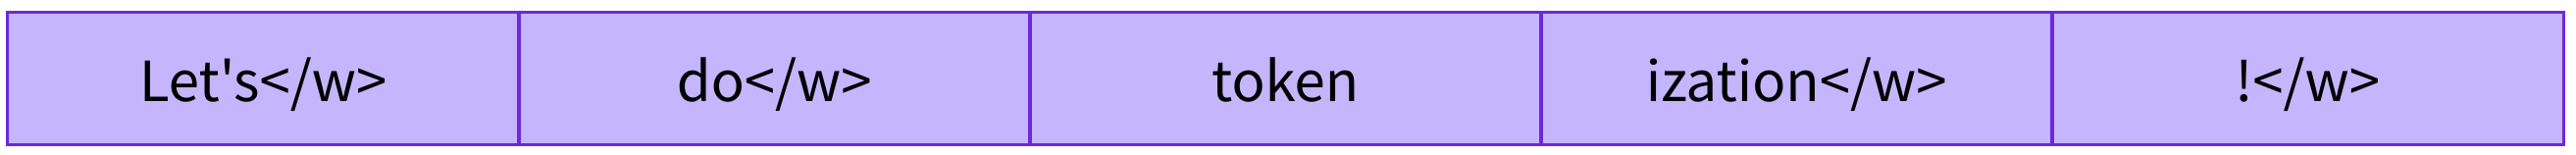


### padding sequence with length

我们也可以一次传入一个batch的字符串，这样便于批量处理。这时我们需要指定padding为True并且设置最大的长度：

In [59]:
pt_batch = tokenizer(text,padding=True,
    truncation=True,#truncation为True会把过长的输入切掉
    max_length=32,
    return_tensors="pt"#如果使用TensorFlow则需要设置return_tensors=”tf”。return_tensors="np": numpy array
)

In [61]:
for key, value in pt_batch.items():
...     print(f"{key}: {value.numpy().tolist()}")

input_ids: [[101, 3835, 3185, 5262, 102, 0], [101, 1045, 2293, 18750, 4730, 102]]
attention_mask: [[1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1]]


In [62]:
batch_sentences = ["Hello I'm a single sentence",
...                    "And another sentence",
...                    "And the very very last one"]
encoded_inputs = tokenizer(batch_sentences)
print(encoded_inputs)

{'input_ids': [[101, 7592, 1045, 1005, 1049, 1037, 2309, 6251, 102], [101, 1998, 2178, 6251, 102], [101, 1998, 1996, 2200, 2200, 2197, 2028, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]}


如果输入是一个batch，那么会返回Attention Mask，它可以告诉模型哪些部分是padding的，从而要mask掉。

In [66]:
'''attention mask'''
sequence_a = "This is a short."
sequence_b = "This is a rather long sequence. It is at least longer than the sequence A."
encoded_sequence_a = tokenizer(sequence_a)["input_ids"]
encoded_sequence_b = tokenizer(sequence_b)["input_ids"]

In [67]:
padded_sequences = tokenizer([sequence_a, sequence_b], padding=True,max_length=32)


In [73]:
padded_sequences.keys()

dict_keys(['input_ids', 'attention_mask'])

所以通过一个attention_mask明确的标出哪个是padding会更加方便。

In [75]:
padded_sequences

{'input_ids': [[101, 2023, 2003, 1037, 2460, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2023, 2003, 1037, 2738, 2146, 5537, 1012, 2009, 2003, 2012, 2560, 2936, 2084, 1996, 5537, 1037, 1012, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}